# EDA Structuring with python

# Objective
`We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. First, we will find the locations with the greatest number of strikes within a single day. Then, we will examine the locations that had the greatest number of days with at least one lightning strike.`

`Next, we will determine whether certain days of the week had more lightning strikes than others. Finally, we will add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month. We will then plot this data on a bar graph`

In [3]:
# import statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from geopy.point import Point

In [4]:
# Reading data
df = pd.read_csv('lightning_strikes.csv')
df.head()

,date,longitude,latitude,number_of_strikes
0,2018-01-03,-73.8,27.0,38
1,2018-01-03,-79.1,28.0,60
2,2018-01-03,-77.9,28.0,47
3,2018-01-03,-74.9,27.0,98
4,2018-01-03,-76.7,30.0,59


# Statistical Summary

In [5]:
# Check for duplicates and drop if the dataset has any

df1 = df.drop_duplicates()


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   longitude          float64
 2   latitude           float64
 3   number_of_strikes  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 319.8+ MB


In [7]:
# Convert the `date` column to datetime data type
df1['date'] = pd.to_datetime(df['date'])

In [8]:
# check how the data is shaped (Rows, Columns)
df1.shape 

(10479003, 4)

In [9]:
# Drop duplicates and check if the shape of the data change 
df1.drop_duplicates().shape

(10479003, 4)

`The shape of the dataset after dropping duplicates is the same, so we can know there's no duplicates.`

In [10]:
# Sort by number of strikes in decending order
df1.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,longitude,latitude,number_of_strikes
6525180,2016-05-26,-96.3,30.3,2386
5355863,2017-04-11,-97.7,31.2,2330
1308996,2016-08-07,-84.0,29.0,2271
5355963,2017-04-11,-97.6,31.2,2242
2124455,2018-08-20,-92.5,35.5,2211
4217218,2018-08-16,-96.1,36.1,2142
6525162,2016-05-26,-96.2,30.3,2095
6313302,2018-08-17,-90.2,36.1,2061
7361966,2018-08-17,-89.9,35.9,2031
27819,2018-08-16,-96.2,36.1,1902


- Locations with most days with at least one lightning strike

`Create a new column called 'center_point_geom' to combine the longitude and latitude to get more understanding of where lightning happen often`

In [11]:
# Create a new column called 'center_point_geom' 
df1['center_point_geom'] = list(zip(df1['latitude'], df1['longitude']))

df1.head()

,date,longitude,latitude,number_of_strikes,center_point_geom
0,2018-01-03,-73.8,27.0,38,"(27.0, -73.8)"
1,2018-01-03,-79.1,28.0,60,"(28.0, -79.1)"
2,2018-01-03,-77.9,28.0,47,"(28.000000000000004, -77.9)"
3,2018-01-03,-74.9,27.0,98,"(27.0, -74.9)"
4,2018-01-03,-76.7,30.0,59,"(29.999999999999996, -76.7)"


In [12]:
# Identify locations that appear most in the dataset
df1.center_point_geom.value_counts()

center_point_geom
(18.3, -77.8)                   320
(18.3, -78.0)                   319
(22.9, -82.5)                   311
(18.3, -77.9)                   310
(18.4, -78.0)                   310
                               ... 
(36.1, -124.5)                    1
(35.4, -120.5)                    1
(36.4, -121.2)                    1
(37.2, -121.4)                    1
(28.000000000000004, -116.4)      1
Name: count, Length: 187942, dtype: int64

`We find that the locations with the most days with lightning strikes had at least one strike on 320 days—nearly one out of every three days of the year. They are all rather close to each other geographically, which makes sense. Notice also that the value_counts() function automatically sorts the results in descending order.`

`Let’s examine whether there is an even distribution of values, or whether 310+ strikes are unusually high value for days with lightning strikes.`

In [13]:
# Identify top 20 locations with the most days of lightning
df1.center_point_geom.value_counts()[:20].rename_axis('coordinates').reset_index(name='counts')

,coordinates,counts
0,"(18.3, -77.8)",320
1,"(18.3, -78.0)",319
2,"(22.9, -82.5)",311
3,"(18.3, -77.9)",310
4,"(18.4, -78.0)",310
5,"(18.3, -77.7)",303
6,"(22.3, -84.2)",302
7,"(18.200000000000003, -78.0)",302
8,"(22.399999999999995, -84.1)",302
9,"(22.9, -82.2)",302


- Lightning strikes by day of week

`We need new columns "week" and "weekday" based on the date column trying to figure out the specific date and week when lightning happens`

In [14]:
# Create two new columns
df1['week'] = df1.date.dt.isocalendar().week
df1['weekday'] = df1.date.dt.day_name()
df1.head()

,date,longitude,latitude,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,-73.8,27.0,38,"(27.0, -73.8)",1,Wednesday
1,2018-01-03,-79.1,28.0,60,"(28.0, -79.1)",1,Wednesday
2,2018-01-03,-77.9,28.0,47,"(28.000000000000004, -77.9)",1,Wednesday
3,2018-01-03,-74.9,27.0,98,"(27.0, -74.9)",1,Wednesday
4,2018-01-03,-76.7,30.0,59,"(29.999999999999996, -76.7)",1,Wednesday


`Now we can calculate the mean number of lightning strikes for each weekday of the year.`

In [15]:
df1[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,11.708626
Monday,11.531541
Saturday,11.831304
Sunday,11.689751
Thursday,11.452641
Tuesday,11.344666
Wednesday,11.464647


`It seems like we have an even distribution of the lightning strikes between the weekdays but on "Tuesday, Wednesday, Thursday and Monday" the number of strikes dip a little bit especially on "tuesday" which takes a big dip.` 

`Lets plot the distributions of strike counts for each day of the week. We want each distribution to be represented as a boxplot.`

In [16]:
# Define the Days order for the plot

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

Text(0.5, 1.0, 'Lightning Distribution per Weekday')

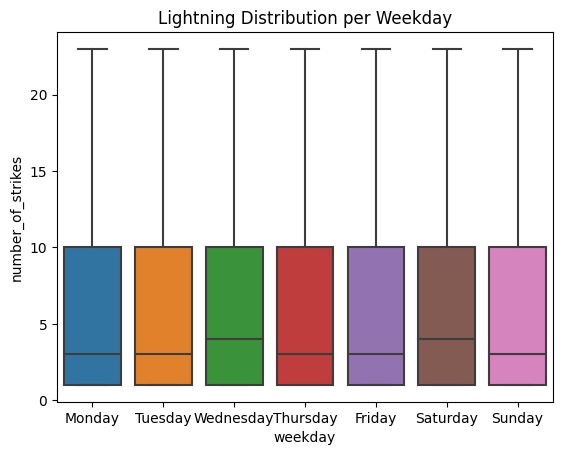

In [17]:
# Boxplot of strike count for each weekday

fig = sns.boxplot(data=df1,
                  x='weekday',
                  y='number_of_strikes',
                  order=weekday_order,
                  showfliers=False);
fig.set_title('Lightning Distribution per Weekday')


`Notice that the median remains the same on almost all of the week days except "wednesday" and "saturday" which are the days where the median lightning strike number spike up. Why might this be? Perhaps the aerosol particles emitted by factories and vehicles increase the likelihood of lightning strike. This is only a speculation, but it's one possible path for further exploration.`

* Monthly lightning strikes

`We will used a diffrent dataframe not to alter the data we got from our previous results. `

In [33]:
df2 = pd.read_csv('lightning_strikes.csv')
df2.head()

,date,longitude,latitude,number_of_strikes
0,2018-01-03,-73.8,27.0,38
1,2018-01-03,-79.1,28.0,60
2,2018-01-03,-77.9,28.0,47
3,2018-01-03,-74.9,27.0,98
4,2018-01-03,-76.7,30.0,59


In [34]:
df2['center_point_geom'] = list(zip(df2['latitude'], df2['longitude']))
df2.head()

,date,longitude,latitude,number_of_strikes,center_point_geom
0,2018-01-03,-73.8,27.0,38,"(27.0, -73.8)"
1,2018-01-03,-79.1,28.0,60,"(28.0, -79.1)"
2,2018-01-03,-77.9,28.0,47,"(28.000000000000004, -77.9)"
3,2018-01-03,-74.9,27.0,98,"(27.0, -74.9)"
4,2018-01-03,-76.7,30.0,59,"(29.999999999999996, -76.7)"


In [35]:
# Tidy up the dataset
columns_drop = ['longitude','latitude']
df2.drop(columns=columns_drop, inplace=True)
df2.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,38,"(27.0, -73.8)"
1,2018-01-03,60,"(28.0, -79.1)"
2,2018-01-03,47,"(28.000000000000004, -77.9)"
3,2018-01-03,98,"(27.0, -74.9)"
4,2018-01-03,59,"(29.999999999999996, -76.7)"


In [36]:
# convert the date column to datetime
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
dtype: object

`To help us with naming the bars of the bar plot, we’ll create three new columns that isolate the year, month number, and month name.
`

In [38]:
df2['year'] = df2.date.dt.year
df2['month'] = df2.date.dt.month
df2['month_txt'] = df2.date.dt.month_name()
df2.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,38,"(27.0, -73.8)",2018,1,January
1,2018-01-03,60,"(28.0, -79.1)",2018,1,January
2,2018-01-03,47,"(28.000000000000004, -77.9)",2018,1,January
3,2018-01-03,98,"(27.0, -74.9)",2018,1,January
4,2018-01-03,59,"(29.999999999999996, -76.7)",2018,1,January


In [39]:
# Calculate total number of strikes per year
df2[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


`Now we’ll calculate the percentage of total lightning strikes for each year that occurred in a given month and assign the results to a new dataframe called lightning_by_month`

In [40]:
# Calculate total lightning strikes for each month of each year
lightning_by_month = df2.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()
lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


In [41]:
 # Calculate total lightning strikes for each year
lightning_by_year = df2.groupby(['year']).agg(
year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()
lightning_by_year.head()


,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


`We need to use the monthly totals to calculate percentages. For each month, we’ll need the monthly total strike count and the total strike count for that year. Let’s create another dataframe called percentage_lightning that adds a new column called year_strikes, which represents the total number of strikes for each year.`

In [42]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()


,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229


`Now we’ll create a new column in our new dataframe that represents the percentage of total lightning strikes for each year that occurred during each month.`

In [46]:
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/percentage_lightning.year_strikes * 100.0)
 
percentage_lightning.head()


,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,August,2016,7250442,41582229,17.436396
2,December,2016,316450,41582229,0.761022
3,February,2016,312676,41582229,0.751946
4,January,2016,313595,41582229,0.754156


`Now we can plot the percentages by month in a bar graph!`

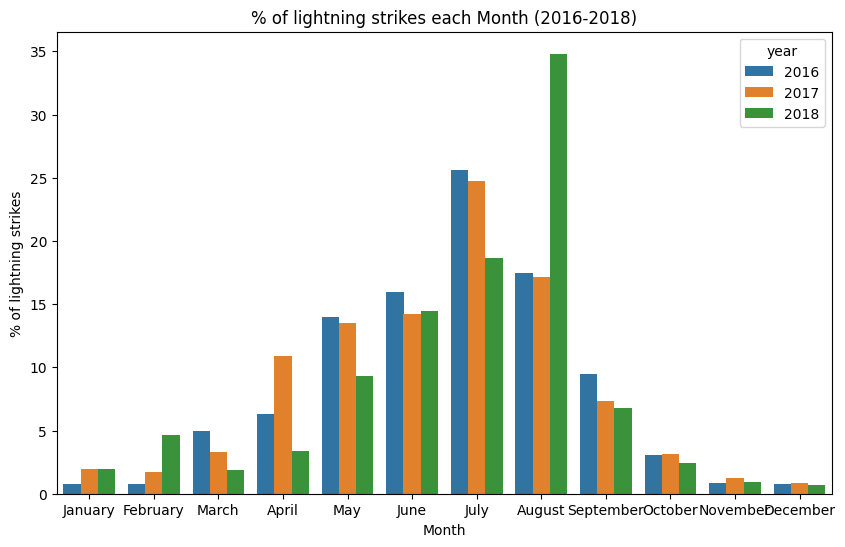

In [47]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
            data = percentage_lightning,
            x = 'month_txt',
            y = 'percentage_lightning_per_month',
            hue = 'year',
            order = month_order );

plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month");


`For all three years, there is a clear pattern over the course of each year. One month stands out. More than 1/3 of the lightning in 2018 happened in August.`